## 네이버 검색 crawling

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="정처기 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'정처기'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'정처기'의 네이버 통합검색 결과입니다."> <title>정처기 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220512.css"> <link rel="stylesheet" type="text/css" href="htt
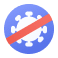
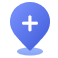
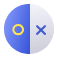
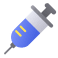

In [1]:
import requests as req

#url read
url = 'https://search.naver.com/search.naver'
res = req.get(url, params={'query' : '정처기'})

print(res.text)

'정보처리기사' 포함된 페이지의 구문을 리스트로 바꿔주기

In [3]:
strings = res.text
strings_row = strings.split('<')

target_lst = []

for text in strings_row:
    target_idx = text.find('정보처리기사')
    target = text[target_idx:]
    if len(target) > 6:
        target_lst.append(target)
        
target_lst = target_lst[1:]
print(target_lst)

['정보처리기사 한방에 합격끝장! 3단계로 합격하는 최적의 합격플랜!\n              \n            ', '정보처리기사 인강 에어클래스', '정보처리기사 최신강의로 과목별 완벽 준비!\n              \n            ', '정보처리기사필기/실기, 정보처리기능사필기/실기 자격증대비반 취업준비까지 가능!\n              \n            ', '정보처리기사 2022년 시험일정(필기/실기) ', "정보처리기사 시험일정이 공개되었다. 정보처리기사 줄여서 '", '정보처리기사실기 일정, ', '정보처리기사 실기', '정보처리기사 실기 [', '정보처리기사 실기, 일명 ', '정보처리기사(', '정보처리기사독학 합격법 시나공 ', '정보처리기사 실기 준비하기 정보처리기사실기 ', '정보처리기사 또한 일반 기업 취업 뿐만아니라 공기업 취업에 가장 기본이 되는 스펙은 바로 자.격.증 이죠 공기업 필수 자격증을 꼭꼭 취득하여 취업에 가산점까지 꼭 챙겨가셔야 합니다 정보처리기사 시험이란?? 정보시스템의... ', '정보처리기사 실기', '정보처리기사 필기 합격 | 전날 벼락치기 | ', '정보처리기사 필기시험을 치루고 가채점한 결과 합격 시험지를 휘날릴 수 있게돼서 제가 공부한 방법을 공유하려고 합니다! 그 전에 제가 ', '정보처리기사" onerror="kdic_noimage(this, \'bg_nimg2\');">', '정보처리기사란 응시자격을 갖춘 자가 산업인력공단에서 시행하는 정보처리기사 시험에 합격하여 그 자격을 취득한 자를 말한다. 정보처리기사 시험은 필기시험과 실기시험으로 이루어지며, 필기시험은 객관식으로 100점을 만점으로 하여 과목당 40점 이상, 전 과목 평균 60점 이상이면 합격한다. 실기시험은 주관식 시험으로 100점을 만점으로 하여 평균 60점 이상이면... ', '정보처리기사 1급으로 신설된 뒤 1999년 현재의 명칭으로 변경되었다. 정보화 사회가 발달함에 따라 컴퓨터 산업이 급속히 신장함으로써

BeautifulSoup 활용하기
- 앞의 정보 추출은 직접 태그와 내용 위치를 찾고 정보 추출을 위한 로직을 새로 만들었음.
- 위의 수고를 덜기 위해 사용

In [4]:
# id find

from bs4 import BeautifulSoup

html = """
<html><body>
<h1 id = 'title'>python</h1>
<p id = 'p1'>python</p>
<p id = 'p2'>world</p>
</body></html>
"""

# BeautifulSoup 객체 생성
soup = BeautifulSoup(html, 'html.parser')

# find 메서드 호출
h1 = soup.find(id='title')
p1 = soup.find(id='p1')
p2 = soup.find(id='p2')

print(h1.string)

python


앵커 태그 url 가져오기

In [5]:
from bs4 import BeautifulSoup

html = """
<html><body>
    <ul>
        <li><a href="http://www.naver.com">naver</a></li>
        <li><a href="http://www.daum.net">daum</a></li>
    </ul>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')
links = soup.find_all("a")

print(links[0].string)
print(links[0].attrs['href'])

for a in links:
    href = a.attrs['href']
    text = a.string
    print(href, text)

naver
http://www.naver.com
http://www.naver.com naver
http://www.daum.net daum


태그의 하위 분기 내용 가져오기

In [7]:
from bs4 import BeautifulSoup

html = """
<html><body>
<div id='books'>
    <h1> 위키북스 도서 </h1>
    <ul class='item'>
        <li> 게임 입문 </li>
        <li> 파이썬 입문 </li>
        <li> 웹 디자인 입문 </li>
    </ul>
</div>
</body></html>
"""

soup = BeautifulSoup(html, 'html.parser')
h1 = soup.select_one("div#books > h1")
li_lst = soup.select("div#books > ul.item > li")

print(h1)
print(li_lst)

<h1> 위키북스 도서 </h1>
[<li> 게임 입문 </li>, <li> 파이썬 입문 </li>, <li> 웹 디자인 입문 </li>]


기상청 xml 날씨 데이터 가져오기
- tag 이름이 'title'과 'wf'인 부분의 내용을 가져오면 **일기예보 제목과 내용 요약**을 확인할 수 있다.

In [11]:
import urllib.request
from bs4 import BeautifulSoup

# weather

url = "https://www.weather.go.kr/w/weather/commentary.do"
res = urllib.request.urlopen(url)

soup = BeautifulSoup(res, 'html.parser')
title = soup.find('title').string
#wf = soup.fint('wf').string

print(title)
print('-'*20)
#print(wf)

날씨해설 - 기상청 날씨누리
--------------------


Selenium을 이용한 동적 페이지 크롤링
- 동적 페이지(Dynamic page)란 url에 관계 없이 해당 웹 페이지 내에서\
사용자의 요청을 바탕으로 서버 측에서 컨텐츠를 채워넣는 방식이다.\
(네이버 지도, 스타벅스 지점 확인 페이지 등)

기존 정적인 페이지에서 했던 방식대로 크롤링을 할 수 없기 떄문에 웹 페이지 제어를 위한 자동 테스팅 모듈인 Selenium 라이브러리 사용
- 특정 페이지에서 과도하게 사용할 경우 IP ban 당할 수 있으니 주의

In [13]:
!pip install selenium

     -------------------------------------- 979.4/979.4 KB 7.8 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\lg\anaconda3\python.exe -m pip install --upgrade pip' command.


     ------------------------------------- 359.0/359.0 KB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 58.2/58.2 KB 3.0 MB/s eta 0:00:00


키워드로 검색한 화면 자동 캡쳐 후 저장

In [19]:
from selenium import webdriver
from urllib.parse import quote_plus
import time

# 필요한 옵션 설정
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Chrome 드라이버 생성
driver = webdriver.Chrome(r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")
driver = webdriver.Chrome(executable_path=r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")

# 해당 URL로 브라우저 실행
driver.get('http://naver.com')

# 키워드 입력한 페이지 스크린샷
url = 'http://search.naver.com/search.naver?where=image&sm=tab_jum&query='
kword = input('검색어를 입력 :')
base_url = url + quote_plus(kword)

driver.get(base_url)
time.sleep(1)
driver.save_screenshot('website.png')

C:\Users\lg\AppData\Local\Temp/ipykernel_4644/3823393113.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")
C:\Users\lg\AppData\Local\Temp/ipykernel_4644/3823393113.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")


검색어를 입력 :파이썬


True

페이지 범위가 넓어 스크롤이 필요한 경우\
검색 페이지를 자동 스크롤하며 스크린 샷을 저장하는 방법이다.

In [ ]:
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
from urllib.parse import quote_plus
import time
import numpy as np

# Chrome 드라이브 생성
driver = webdriver.Chrome(r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")
driver = webdriver.Chrome(executable_path=r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")

# 해당 URL로 브라우저 실행
driver.get('http://naver.com')

url = 'https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
kword = input('검색어를 입력:')
base_url = url + quote_plus(kword)

driver.get(base_url)

# 스크롤하며 스크린 샷
body = driver.find_element_by_css_selector('body')
for i in range(5):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(abs(np.random.normal(1,3)))
    driver.save_screenshot(f'website_{i}.png')

C:\Users\lg\AppData\Local\Temp/ipykernel_4644/3513374466.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")
C:\Users\lg\AppData\Local\Temp/ipykernel_4644/3513374466.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\Users\lg\Downloads\잡다한것\chromedriver_win32\chromedriver.exe")


검색어를 입력:코로나


C:\Users\lg\AppData\Local\Temp/ipykernel_4644/3513374466.py:21: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  body = driver.find_element_by_css_selector('body')
